## Confirmed COVID 19 cases analysis
We're going to analyse a dataset with COVID 19 confirmed cases per country per provice globally, between January 22<sup>nd </sup> 2020, to April 30<sup>th </sup> 2020. This was part of a COURSERA guided project, but I've added some questions and graphs by my own.

#### Part 1: Analyzing Confirmed cases Dataset

##### Getting data info

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import calendar

In [2]:
# Getting the dataframe ready
df = pd.read_csv("covid19_Confirmed_dataset.csv")
df.drop(["Lat", "Long"], axis=1, inplace = True) # We're not going to use these columns in this analysis
df

,Province/State,Country/Region,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Getting some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 102 entries, Province/State to 4/30/2020
dtypes: int64(100), object(2)
memory usage: 212.1+ KB


This dataset consists in the following columns:
- Province/State: Strings
- Country/Region: Strings
- Lat: Float
- Long: Float
- The next 100 columns represent each one the number of confirmed cases in a single day between January 22<sup>nd </sup> 2020, to April 30<sup>th </sup> 2020, in MM/DD/YY format: Int64

In [4]:
# Checking null values
df.isna().sum()

Province/State    184
Country/Region      0
1/22/2020           0
1/23/2020           0
1/24/2020           0
                 ... 
4/26/2020           0
4/27/2020           0
4/28/2020           0
4/29/2020           0
4/30/2020           0
Length: 102, dtype: int64

Except for the Province/State column, the rest looks ok. I am more interested in analyzing cases by country, so I'll group the dataset

In [5]:
# Grouping confirmed cases by country (Because of Province/State column, country names are repeated)

corona_dataset_aggregated = df.groupby("Country/Region").sum(numeric_only=True)

#Here, sinces the Province/State column does not contain a numeric value, it is removed from the Data Frame

corona_dataset_aggregated

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


#### 1.1: Visualizing some Data about Ecuador and other Latin american countries

I wanted to see how the number of confirmed cases evolved with time in my country, and compare it with other two Latin american countries that, in the time, were between the most affected ones in the region.

In [6]:
# First, I want to find those countries

'''Note that in the previous step, Country/Region 
column has been set as the index colum'''

LatinCountries = corona_dataset_aggregated.loc[['Ecuador', 'Brazil', 'Argentina']] 
LatinCountries

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Ecuador,0,0,0,0,0,0,0,0,0,0,...,10398,10850,11183,22719,22719,22719,23240,24258,24675,24934
Brazil,0,0,0,0,0,0,0,0,0,0,...,43079,45757,50036,54043,59324,63100,67446,73235,79685,87187
Argentina,0,0,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428


<Figure size 1000x400 with 0 Axes>

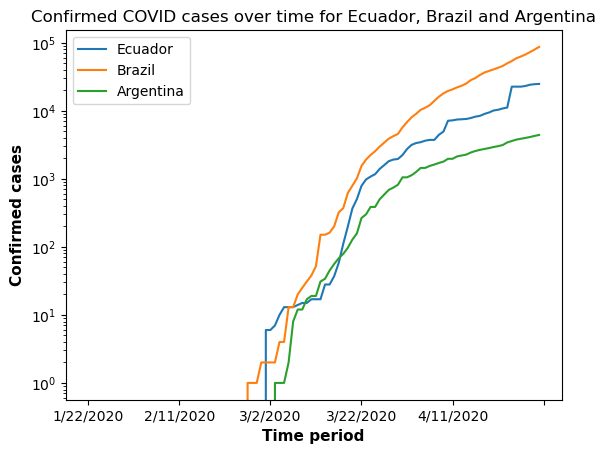

In [7]:
# Then, I'll plot the three countries
fig = plt.figure(figsize = (10,4))
graph1 = LatinCountries.T.plot() # I had to transpose the data frame fot better visualization

# I had to re-scale the Y-axis because in the first attempt, I couldn't appreciate each countrie's evolution over time
graph1.set_yscale('log') 

# Formatting the graph
plt.title('Confirmed COVID cases over time for Ecuador, Brazil and Argentina',fontsize = 12, fontweight = 'medium')
plt.xlabel('Time period', fontsize = 11, fontweight = 'semibold')
plt.ylabel('Confirmed cases',fontsize = 11, fontweight = 'semibold')
plt.legend()
plt.show()

#### Insight
Confirming what was reported by the media in 2020, the three countries reported their first cases within very similar time periods, with just a few days of difference. From there, Ecuador had a very high rate of infection in the first few days, even surpassing Brazil; then it decreased briefly and maintained a daily report of confirmed cases higher than that of Argentina. 

This catches my attention, given that the Ecuadorian population is significantly smaller, which indicates to me that the rate of infection here was incredibly high compared to the other two countries.

#### 1.2 Visualizing Daily Infection Rates for some countries

Next, I want to know when Ecuador had the highest number of confirmed cases in a single day. For that, first I'll take a quick look at a graph, and them I'll perform some filtering to the dataframe to get the exact values.

In [8]:
# Daily Infection rate (# new cases/day)

"""For this purpose, I'll calculate the difference between each day 
for the number of confirmed cases"""

EcuadorData = corona_dataset_aggregated.loc['Ecuador'].diff()
EcuadorData.to_frame()

,Ecuador
1/22/2020,NaN
1/23/2020,0.0
1/24/2020,0.0
1/25/2020,0.0
1/26/2020,0.0
...,...
4/26/2020,0.0
4/27/2020,521.0
4/28/2020,1018.0
4/29/2020,417.0


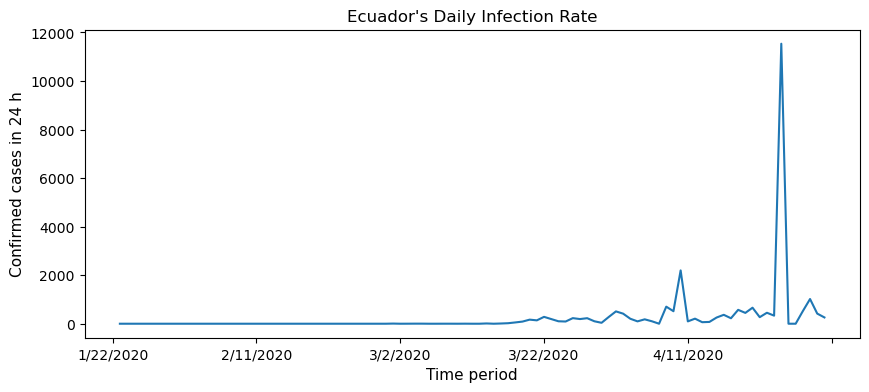

In [9]:
# Now, I'll plot the results
fig = plt.figure(figsize = (10,4))
EcuadorData.plot()
plt.title("Ecuador's Daily Infection Rate",fontsize = 12, fontweight = 'medium')
plt.xlabel('Time period', fontsize = 11, fontweight = 'medium')
plt.ylabel('Confirmed cases in 24 h',fontsize = 11, fontweight = 'medium')
plt.show()

### Insight
Here we have two significant peaks; both occurred between at the end of March and in the middle of April, which rejects my initial hypothesis that Ecuador had its highetst infection rate in early March. Later, I'll get the exact day for the highest peak.

##### Comparing Infection Rates for different countries

I want to compare the infection rate between Ecuador, Brail and Argentina.

In [10]:
BrasilData = corona_dataset_aggregated.loc['Brazil'].diff()
BrasilData.to_frame()

,Brazil
1/22/2020,NaN
1/23/2020,0.0
1/24/2020,0.0
1/25/2020,0.0
1/26/2020,0.0
...,...
4/26/2020,3776.0
4/27/2020,4346.0
4/28/2020,5789.0
4/29/2020,6450.0


In [11]:
ArgentinaData = corona_dataset_aggregated.loc['Argentina'].diff()
ArgentinaData.to_frame()

,Argentina
1/22/2020,NaN
1/23/2020,0.0
1/24/2020,0.0
1/25/2020,0.0
1/26/2020,0.0
...,...
4/26/2020,112.0
4/27/2020,111.0
4/28/2020,124.0
4/29/2020,158.0


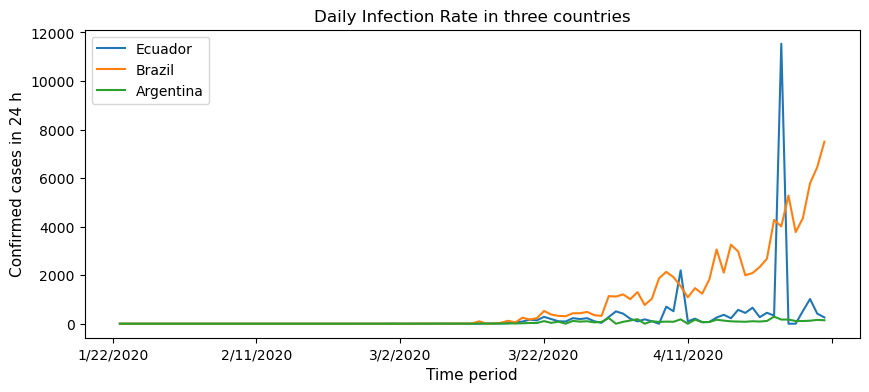

In [12]:
# Now, I'll plot the results
fig = plt.figure(figsize = (10,4))
EcuadorData.plot()
BrasilData.plot()
ArgentinaData.plot()
plt.title("Daily Infection Rate in three countries",fontsize = 12, fontweight = 'medium')
plt.xlabel('Time period', fontsize = 11, fontweight = 'medium')
plt.ylabel('Confirmed cases in 24 h',fontsize = 11, fontweight = 'medium')
plt.legend()
plt.show()

### Insight
Now, here's a very interesting behavior for Ecuador. On a single day, the country had a steep increase in the number of confirmed cases in 24h, even suprasing its neighbors Brazil and Argentina. So, I want to compare their infection rates numerically

In [13]:
# Calculating the maximun infection rate for those countries

MaxEcu= corona_dataset_aggregated.loc['Ecuador'].diff().max()
MaxBra= corona_dataset_aggregated.loc['Brazil'].diff().max()
MaxArg= corona_dataset_aggregated.loc['Argentina'].diff().max()
print(f'Maximun number of new cases in 24h:\n Ecuador: {MaxEcu} \n Brazil: {MaxBra} \n Argentina: {MaxArg}')


Maximun number of new cases in 24h:
 Ecuador: 11536.0 
 Brazil: 7502.0 
 Argentina: 291.0


#### Insight
Ecuador had about 35% more new cases in under 24 hours than Brazil and almost 40 times the number of new cases under 24 hours in Argentina! As an Ecuadorian, that data made me remember those days back in my country, and reflect on how bad our situation was at that time.

#### Max. Infection rate for all countries
Now that I've seen the tremendous number of new cases in 24h in Ecuador, I wonder how this number compares with the rest of the world. So, let's do it

In [14]:
# Maximun Infection Rate of all countries in the world

countries= list(corona_dataset_aggregated.index)
max_infection_rates= []
for pais in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[pais].diff().max())

CoronaMaxInf = corona_dataset_aggregated
CoronaMaxInf["Max. Infection rate"] = max_infection_rates
CoronaMaxInf

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,Max. Infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [41]:
# Next, I want to see the evolution of confirmed cases for the 3 countries which had the highest rate.
corona_sorted = CoronaMaxInf.sort_values(by = 'Max. Infection rate', ascending = False)
top_3 = corona_sorted.iloc[:3]

# Dropping the last column that was created automatically
top_3.drop('Max. Infection rate', axis =1, inplace = True)
top_3

C:\Users\thepr\AppData\Local\Temp\ipykernel_15084\412640182.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,811865,840351,869170,905358,938154,965785,988197,1012582,1039909,1069424
France,0,0,2,3,3,3,4,5,5,5,...,158168,155980,158303,159952,161644,162220,165963,169053,166543,167299
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,83853,83868,83884,83899,83909,83912,83918,83940,83944,83956


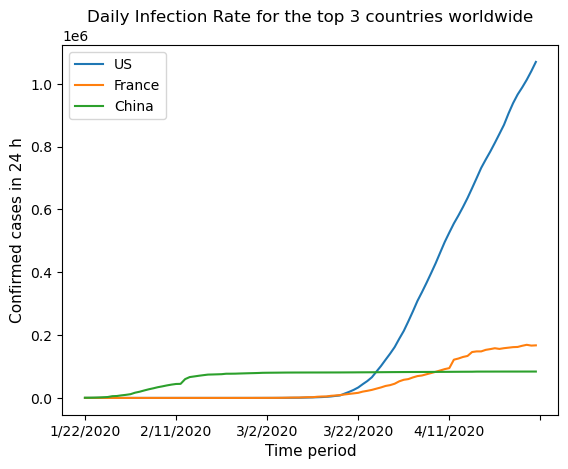

In [45]:
# Plotting the results 
top_3.T.plot()
plt.title("Daily Infection Rate for the top 3 countries worldwide",fontsize = 12, fontweight = 'medium')
plt.xlabel('Time period', fontsize = 11, fontweight = 'medium')
plt.ylabel('Confirmed cases in 24 h',fontsize = 11, fontweight = 'medium')
plt.legend()
plt.show()

#### Insight
It seems that US has the leading spot for now, with a very significant increase compared with the other two countries behind it. I want to see more countries

#### 1.3 Comparing the top 10 countries with the highest infection rate worldwide

In [15]:
# Showing only Maximun Infection rate for all countries
corona_data = CoronaMaxInf.loc[:,'Max. Infection rate'].to_frame()
corona_data

,Max. Infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [43]:
# Getting the data
top_10 = corona_data.sort_values(by = 'Max. Infection rate', ascending = False)
top_10 = top_10.iloc[:10]

# While making the graph, I realized that 'United Kingdom' was too large, so I updated it
top_10 = top_10.rename(index={'United Kingdom': 'UK'})

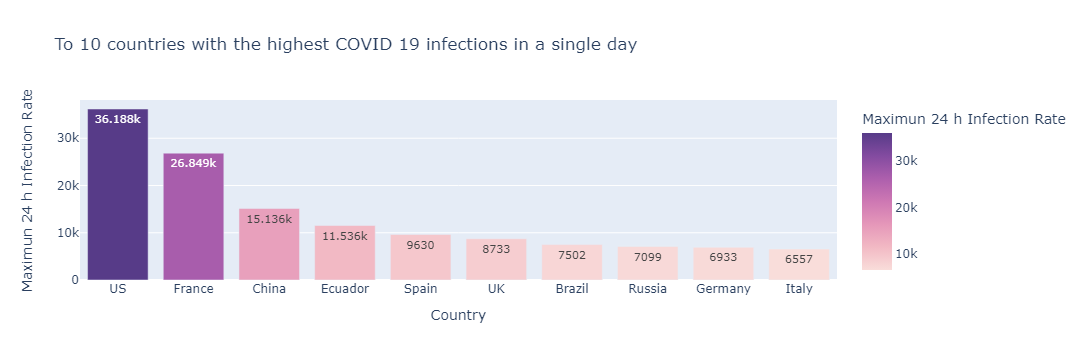

In [44]:
#Plotting the graph
fig2 = px.bar(top_10.reset_index(), x ='Country/Region', y='Max. Infection rate', 
              title = 'To 10 countries with the highest COVID 19 infections in a single day',
             labels = {'Country/Region': 'Country', 'Max. Infection rate':'Maximun 24 h Infection Rate' },
             text_auto = True, color = 'Max. Infection rate', color_continuous_scale = 'Purpor')

fig2.update_traces(textfont_size=11, textangle=0, textposition="inside", cliponaxis=False)
fig2.update_layout(showlegend=False)
fig2.show()

#### Insight
###### (If the grah does not display, see the png version of it in the "Pictures" folder on the left)

For me, this is astonishing. Now I can see why Ecuador stood out among some Latin American countries when comparing their maximum infection rates. It turns out Ecuador was among the top 10 worldwide, surpassing even Brazil, the UK, and Spain, despite having approximately 92%, 74%, and 63% fewer inhabitants than the other three countries mentioned earlier. With this data, I can reflect on how the healthcare system in my country failed miserably during those days, reaching the 4th place out of 10 in the countries with the highest 24-hour infection rates in the world.

### Extra: obtaining data manually

Despite having all the information in the interactive graph above; I still want to access to some data manually; for example, when a country had its highest number of confirmed cases in 24h. I'll use US as an example

In [20]:
# Which country has the highest infection rate (confirmed cases in 24 h)
max_global = corona_data['Max. Infection rate'].max()
max_global

36188.0

In [46]:
# Country name
pais_data = corona_data.loc[corona_data['Max. Infection rate'] == max_global].index
pais = pais_data.values[0]
pais

print(f'Country with the hightest number of confiermed cases in 24h worldwide: {pais}, with {max_global} cases')

Country with the hightest number of confiermed cases in 24h worldwide: US, with 36188.0 cases


In [39]:
# When was it
date_data = corona_dataset_aggregated.loc[pais].diff().to_frame()
date_max_inf_rate = date_data[date_data[pais] == max_global].index.values[0]
date_max_inf_rate
date_formatted = datetime.strptime(date_max_inf_rate, '%m/%d/%Y')

# Get the month
nombre_mes = calendar.month_name[date_formatted.month]

# Get the day with the desired suffix
dia = date_formatted.day
if 4 <= dia <= 20 or 24 <= dia <= 30:
    sufijo = 'th'
else:
    sufijo = ['st', 'nd', 'rd'][dia % 10 - 1]

# Formatting the date
fecha_formateada = f"{nombre_mes} {dia}{sufijo} {date_formatted.year}"

print(f'Date of max. number of new cases in a single day for {pais}: {fecha_formateada}')

Date of max. number of new cases in a single day for US: April 24th 2020
